# Проект "Анализ оттока клиентов"

В проекте представлены данные о клиентах банка "Метанпром". Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Маркетинговый отдел банка хочет узнать, какие клиенты склонны у ходу из банка, а какие нет.

Основные этапы проекта:  
* Предобработка данных
* Исследовательский анализ данных
* Проверка гипотезы разницы дохода двух групп
* Проверка гипотезы равенства баланса двух групп
* Сегментация клиентов
* Выводы и рекомендации

# Цель проекта:
    
* Выделить сегменты клиентов банка, склонных в уходу;
* Сформировать рекмендации для выделенных сегментов.

## Предобработка данных

Загружаем библиотеки и данные:

In [2]:
pip install phik

     |████████████████████████████████| 679 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()
pd.options.display.max_colwidth = 150
import phik as p

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets//bank_scrooge.csv')
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


In [7]:
len(df[df['churn']==1])

1820

Посмотрю, зависят ли пропуски от остальных данных.

In [8]:
df_p = df.copy()
def propuski(row):
    if row['age'] >0:
        return 1
    else:
        return 0
    
def propuski1(row):
    if row['balance'] >=0:
        return 1
    else:
        return 0

df_p['priznak_age'] = df_p.apply(propuski, axis=1)
df_p['priznak_balance'] = df_p.apply(propuski1, axis=1)

In [9]:
df_p.groupby('priznak_age')[['score','equity','products','credit_card','last_activity','EST_SALARY', 'churn']].mean()

,score,equity,products,credit_card,last_activity,EST_SALARY,churn
priznak_age,,,,,,,
0,855.153846,1.384615,1.346154,0.769231,0.769231,178585.199231,0.038462
1,848.682575,2.630840,1.871466,0.680168,0.522859,147786.809731,0.182374


In [10]:
df_p.groupby('priznak_balance')[['score','equity','products','credit_card','last_activity','EST_SALARY', 'churn']].mean()

,score,equity,products,credit_card,last_activity,EST_SALARY,churn
priznak_balance,,,,,,,
0,865.35207,0.050980,1.162092,0.815686,0.549455,226310.208654,0.005664
1,843.73926,3.395068,2.080986,0.640104,0.515769,124501.872366,0.234523


В выгрузке 10 000 клиентов. Из них 1820 отточных клиентов.  
В полях age и balance есть пропуски.  

Пропусков в поле age слишком мало - можно просто поставить заглушку для удобства.  
Пропусков в поле balance значительно больше (почти 23% датасета). Судя по группировке выше, клиенты с пропуском баланса имеют значительно более низкий уровень оттока - меньше 1% против 18% в среднем. Также сильно отличаются средняя оценочная зп и средний балл оценки недвижимости. Судя по всему equity по клиентам без баланса почти не оценивался (возможно процесс онбординга в какой-то момент не оценивает недвижимость). В купе с превышением по зп такие клиенты могут являться вкладчиками - остатков на счету у них нет, недвижимость не оценивается, зарплата выше.

Удалять такие пропуски нельзя. Возможно nan имеют клиенты без текущего счёта (например, клиенты с кредиткой, ипотекой, рассрочкой и тд).

In [11]:
df['age'] = df['age'].fillna(1)

In [12]:
df = df.astype({'age':'int'})

Переименую столбцы.

In [13]:
df = df.rename(columns={'USERID':'user_id', 'EST_SALARY':'salary'})
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


Пробегусь по столбцам.

In [14]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Заменю названия городов на 1,2,3 для использования этих данных в расчёте корреляции.

In [15]:
df['city_copy'] = df['city'].copy()

In [16]:
df= pd.get_dummies(df, columns=['city_copy'])

In [17]:
df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

In [18]:
min_age = df[df['age']>1]['age'].min()
print(f'Минимальный возраст клиентов: {min_age}')
max_age = df['age'].max()
print(f'Максимальный возраст клиентов: {max_age}')

Минимальный возраст клиентов: 18
Максимальный возраст клиентов: 86


Посмотрю, у кого ноль продуктов.

In [19]:
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль
8957,147837,962.0,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,0,1,0


Скорее всего, у клиента на самом деле должен быть один продукт - кредитки нет. Данных об остатках тоже нет.

In [20]:
df['products'] = df['products'].replace([0], [1])

Теперь к дубликатам.

In [21]:
df.duplicated().sum()

0

Явных дублей нет. Единственный столбик, где они могут быть - user_id.

In [22]:
df_dup = df.groupby('user_id')['city'].count().reset_index()
df_dup = df_dup[df_dup['city'] > 1]
len(df_dup)

73

73 клиента имеют одинаковый id.
Посмотрим, можно ли удалять такие дубли.

In [23]:
df[df['user_id'].isin(df_dup['user_id'])].sort_values(by='user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль
1893,116540,883.0,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,0,1,0
7694,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,0,0,1
7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,0,0,1
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,0,1,0
5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0,0,0,1
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,0,1,0
1411,123461,829.0,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1,0,0,1
8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0,0,1,0
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1,0,0,1
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0,0,1,0


Удалять нельзя. Предполагаю, что по каким-то причинам система некорректно назначала разным клиентам одинаковый id. Будто в системе не соблюдается принцип изоляции при хранении данных.  

Можно переходить к анализу данных.

Итоги предобработки:
* Формат данных скорректирован
* Столбцы переименованы
* Часть пропущенных значений заменены на заглушку

## Анализ данных

В данном блоке необходимо:  
* Сравнить профили клиентов по основным признакам в разрезе отток/не отток
* Изучить распределение признаков в разрезе отток/не отток
* Проверить корреляцию между признаками и оттоком

In [24]:
def sravnenie(category):
    for i in category:
        delta_mean = round(df[df['churn'] == 1][i].mean()/df[df['churn'] == 0][i].mean()-1,2)
        delta_med = round(df[df['churn'] == 1][i].median()/df[df['churn'] == 0][i].median()-1,2)
        print(f'Среднее по {i}: {round(df[i].mean())}')
        print(f'Дельта между средними отточных и неотточных по {i}: {delta_mean}')
        print(f'Дельта между медианами отточных и неотточных по {i}: {delta_med}')
        print('               ')

In [25]:
category = ['salary', 'balance', 'score', 'age']
sravnenie(category)

Среднее по salary: 147867
Дельта между средними отточных и неотточных по salary: 0.0
Дельта между медианами отточных и неотточных по salary: 0.06
               
Среднее по balance: 827794
Дельта между средними отточных и неотточных по balance: 0.54
Дельта между медианами отточных и неотточных по balance: 0.65
               
Среднее по score: 849
Дельта между средними отточных и неотточных по score: 0.02
Дельта между медианами отточных и неотточных по score: 0.02
               
Среднее по age: 43
Дельта между средними отточных и неотточных по age: -0.03
Дельта между медианами отточных и неотточных по age: -0.03
               


In [26]:
df.groupby('churn')[['age','score','equity','products','credit_card','last_activity','salary','balance']].mean().reset_index()

,churn,age,score,equity,products,credit_card,last_activity,salary,balance
0,0,42.892421,845.428362,2.374817,1.757579,0.709169,0.483741,147783.200108,7.339826e+05
1,1,41.428022,863.401099,3.763736,2.376374,0.551099,0.702198,148243.010198,1.133993e+06


Сравнивая средние значения отточных и не отточных клиентов можно заключить:  
* Возраст, оценочная зарплата почти не отличаются.  
* Средний балл оценки недвижимости у отточных клиентов почти в полтора раза выше.  
* У отточного клиента также выше среднее колччисевто продуктов (2,37 против 1,76).  
* Кредитная карта реже встречается у отточных клиентов (0,55 против 0,71)
* Средний показатель активности выше у отточных.
* Средний остаток у отточных примерно в 1,5 выше

Переходим к категориальных.

In [27]:
df_copy = df.copy()
df_copy['credit_card'] = df_copy['credit_card'].replace([0,1], ['нет', 'да'])
df_copy['last_activity'] = df_copy['last_activity'].replace([0,1], ['нет', 'да'])

In [28]:
def sravnenie1(category):
    for i in category:
        df_pivot = df_copy.pivot_table(index=i, values = 'churn', aggfunc = 'mean').reset_index()
        plt.figure(figsize=(12,5))
        sns.barplot(data=df_pivot, x=i, y='churn')
        plt.ylabel('churn_rate')
        plt.title('Доля отточных по '+i)
        plt.axhline(y=df['churn'].mean())
        plt.show()

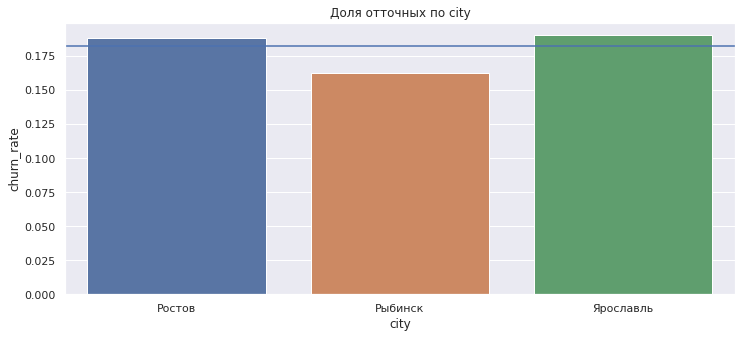

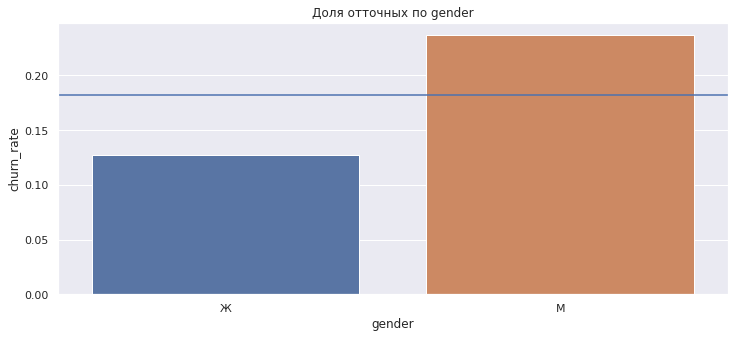

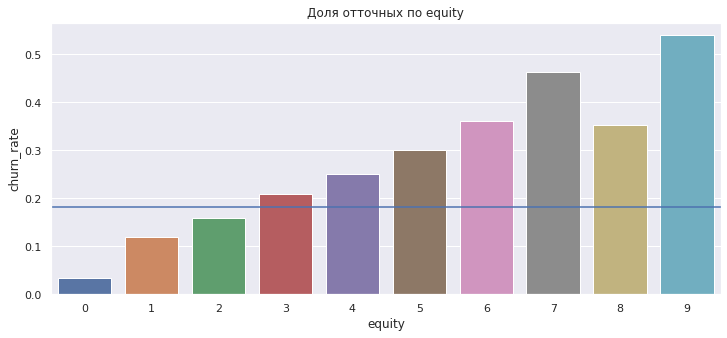

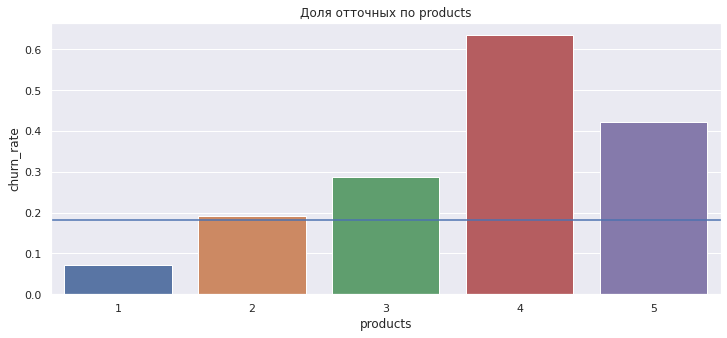

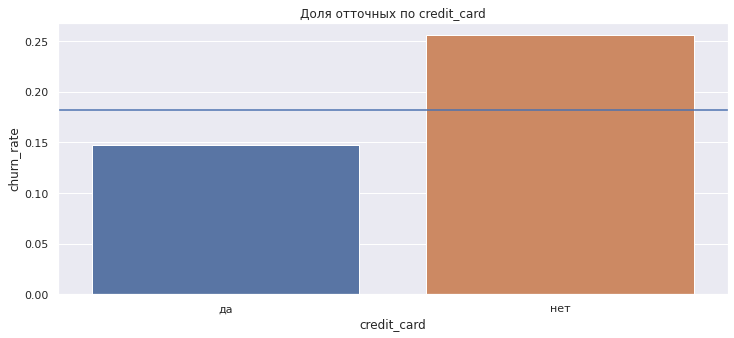

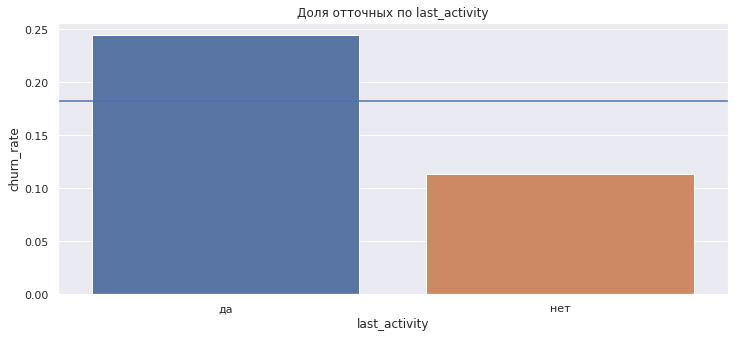

In [29]:
category = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']
sravnenie1(category)

По данным графиков:
* Уровень оттока в городах почти одинаковый  
* Мужчины в большей степени склонны у оттоку  
* Клиенты с баллом оценки недвижимости более 3 по нарастающей более склонны к оттоку. Максимальное значение - 9 баллов (55%)  
* Клиенты с количеством продуктов превышающих 2 более склонны к оттоку. С 4 продуктами ушло порядка 2/3 клиентов
* Отсутствие кредитки является фактором для оттока
* Уровень оттока у клиентов, которые не активны, в 2 раза превышает уровень оттока активных клиентов.

Теперь посмотрим распределение дохода, остатков, баллов скоринга и возраста в необходимом разрезе.

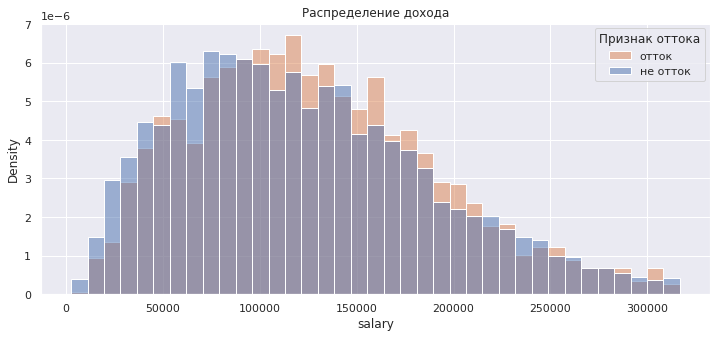

In [31]:
df_salary = df[df['salary'] <= np.percentile(df['salary'], [95][0])]
plt.figure(figsize=(12,5))
sns.histplot(df_salary, x='salary', hue = df['churn'], stat="density", common_norm=False)
plt.legend(['отток', 'не отток'], title='Признак оттока')
plt.title('Распределение дохода')
plt.show()

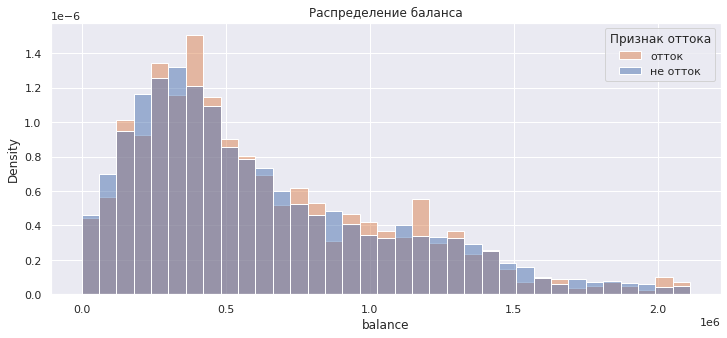

In [32]:
df_balance = df.dropna(subset=['balance']).reset_index()
plt.figure(figsize=(12,5))
df_balance = df_balance[df_balance['balance'] <= np.percentile(df_balance['balance'], [95][0])]
sns.histplot(df_balance, x='balance', hue = df['churn'], stat="density", common_norm=False)
plt.legend(['отток', 'не отток'], title='Признак оттока')
plt.title('Распределение баланса')
plt.show()

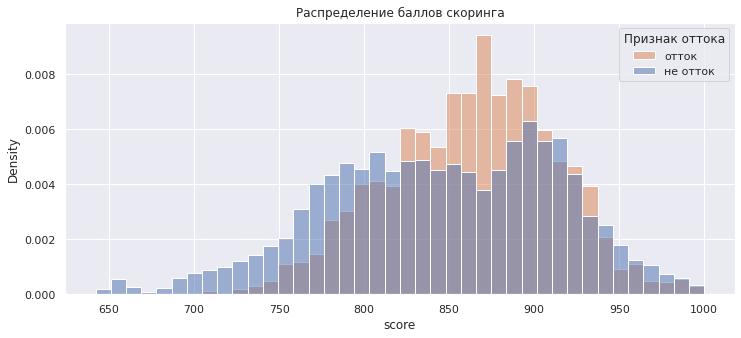

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(df, x='score', hue = df['churn'], stat="density", common_norm=False)
plt.legend(['отток', 'не отток'], title='Признак оттока')
plt.title('Распределение баллов скоринга')
plt.show()

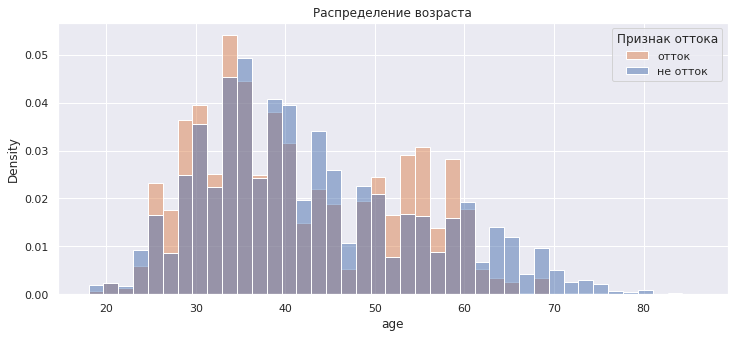

In [34]:
plt.figure(figsize=(12,5))
df_age = df[df['age'] != 1]
sns.histplot(df_age, x='age', hue = df['churn'], stat="density", common_norm=False)
plt.legend(['отток', 'не отток'], title='Признак оттока')
plt.title('Распределение возраста')
plt.show()

По данным графиков:
* Доход отточных и не отточных клиентов распределен почти одинаково. Есть небольшое смещение в сторону 150к у отточных. И к 50к у неотточных  
* Распределение баланса также похоже. В некоторых бакетах отточные клиенты представлены больше (например, около 400к и от 700к до 1100к)
* Распределение баллов скоринга отличается. Явно выделяются данные отточных клиентов - в диапазоне 830-900 баллов
* Самое заметное различие в возрасте - диапазон 50-60 лет и диапазон 25-30 лет. Несколько бакетов имеет двойное превышение относительно неотточных клиентов.

In [35]:
df_copy3 = df.drop(columns='city')
df_corr=df_copy3.loc[:,df_copy3.columns != 'user_id'].phik_matrix(interval_cols=['score', 'age', 'balance', 'salary'])
df_corr

,score,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль
score,1.000000,0.071359,0.043122,0.527991,0.170900,0.419670,0.208895,0.054473,0.395960,0.228179,0.087290,0.027389,0.084186
gender,0.071359,1.000000,0.225983,0.064554,0.045424,0.071954,0.196238,0.014156,0.144714,0.218799,0.017018,0.019485,0.036020
age,0.043122,0.225983,1.000000,0.037127,0.000000,0.105954,0.120863,0.060133,0.261062,0.141465,0.056585,0.042375,0.075341
equity,0.527991,0.064554,0.037127,1.000000,0.000000,0.584335,0.221940,0.051091,0.286452,0.352726,0.065462,0.000000,0.054950
balance,0.170900,0.045424,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.374373,0.024701,0.000000,0.023207,0.047921
products,0.419670,0.071954,0.105954,0.584335,0.000000,1.000000,0.270911,0.112497,0.222957,0.259877,0.045259,0.084728,0.107977
credit_card,0.208895,0.196238,0.120863,0.221940,0.000000,0.270911,1.000000,0.049761,0.038252,0.202997,0.152788,0.076669,0.178614
last_activity,0.054473,0.014156,0.060133,0.051091,0.000000,0.112497,0.049761,1.000000,0.046131,0.261174,0.000000,0.074618,0.074923
salary,0.395960,0.144714,0.261062,0.286452,0.374373,0.222957,0.038252,0.046131,1.000000,0.047635,0.136212,0.101617,0.176235
churn,0.228179,0.218799,0.141465,0.352726,0.024701,0.259877,0.202997,0.261174,0.047635,1.000000,0.000000,0.046001,0.033644


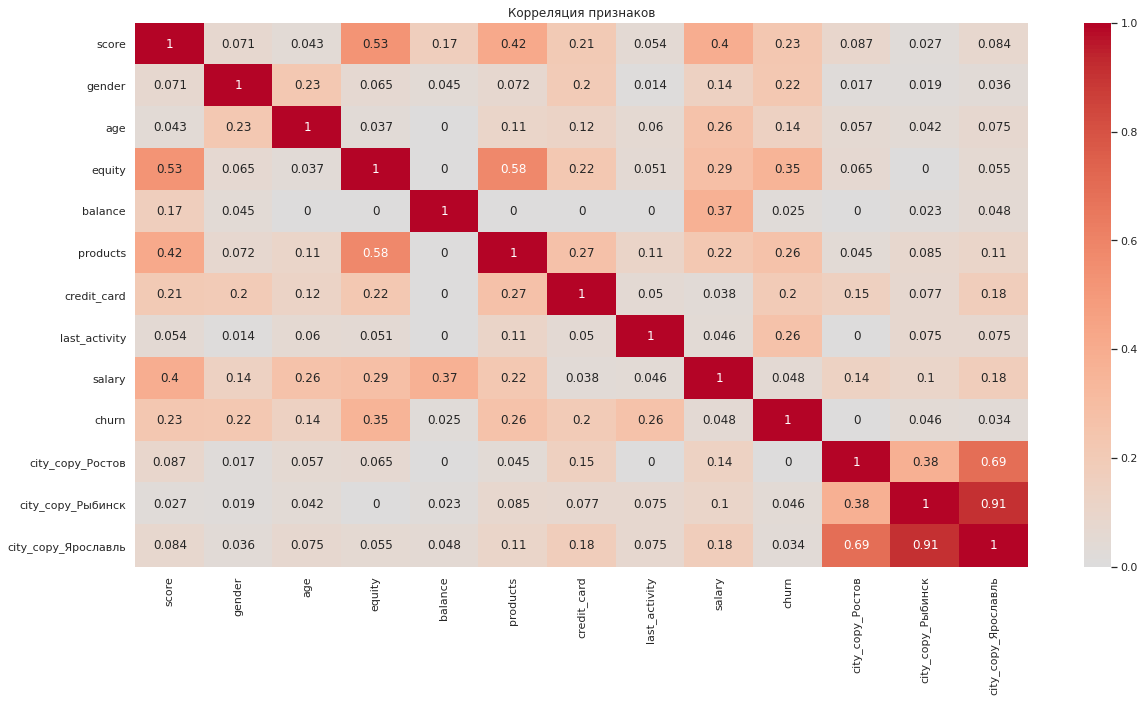

In [36]:
df_heat=df_copy3.loc[:,df_copy3.columns != 'user_id'].phik_matrix(interval_cols=['score', 'age', 'balance', 'salary'])
plt.figure(figsize=(20,10))
sns.heatmap(df_heat, cmap='coolwarm', center=0, annot = True)
plt.title('Корреляция признаков')
plt.show()

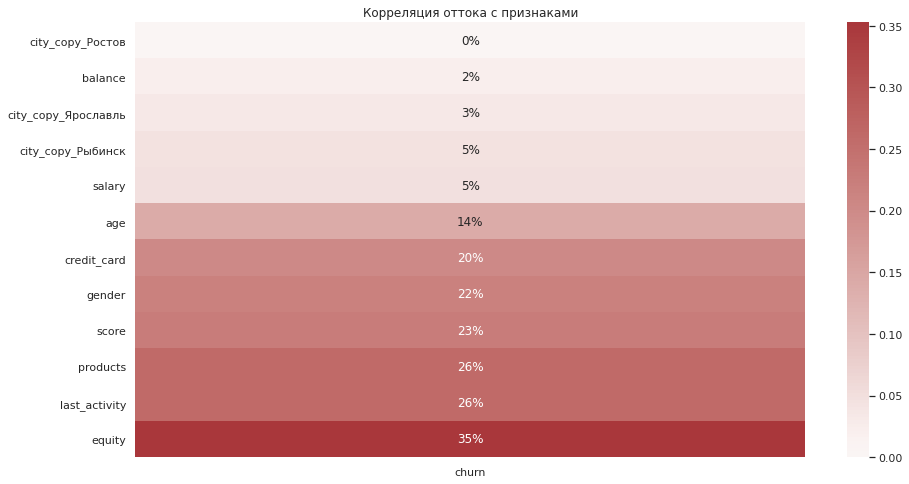

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr.loc[:,['churn']].drop('churn').sort_values('churn'), cmap='vlag', center=0, annot = True, fmt=".0%")
plt.title('Корреляция оттока с признаками')
plt.show()

У оттока почти со всеми признаками очень слабая корреляция (до 0,3).  
Самая сильная - у признака "количество баллов собственности" - 0,35
Города, баланс, оценочная зарплата не влияют совсем.  

По итогам исследовательского анализа:  
  Основные различия отточного и неотточного клиента:  
*  Возраст, оценочная зарплата почти не отличаются.  
*  Средний балл оценки недвижимости у отточных клиентов почти в полтора раза выше.  
*  У отточного клиента также выше среднее колччисевто продуктов (2,37 против 1,76).  
*  Кредитная карта реже встречается у отточных клиентов (0,55 против 0,71)  
*  Средний показатель активности выше у отточных.  
*  Средний остаток у отточных примерно в 1,5 выше  
*  Клиенты возраста 25-30 и 50-60 чаще оттекают
*  Рейтинг отоочных клиентов чаще всего находится в диапазоне 830-900 баллов
*  Клиенты с доходом 100к+ чаще оттекают

Признаки оттока:  
* Признак, имеющий наибольшую корреляцию - "Количество баллов собственности" - 0.35
* Признаки, почти не имеющие корреляцию с оттоком - город, зарплата, остатки.
* Остальные признаки имеют очень слабую корреляцию в диапазоне 0.14-0.26

Перехожу к проверке гипотез.

## Проверка гипотезы 1

Проверим гипотезу различия оценочного дохода между теми клиентами, которые ушли и теми, которые остались.  

H0: Различий в оценочном доходе у отточных и неотточных клиентов нет.  
H1: Различия в оценочном доходе у отточных и неотточных клиентов есть.  


Гипотезу проверим с помощью критерия Стьюдента и критерия Манна-Уитни. p-value = 0.05  

In [38]:
#Критерий Стьюдента:
alpha = 0.05
df_churn = df[df['churn'] == 1]['salary']
df_no_churn = df[df['churn'] == 0]['salary']

results = st.ttest_ind(df_no_churn, df_churn)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в оценочном доходе статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии оценочного дохода сделать нельзя'
    ) 

p-значение:  0.8987254468291451
Не получилось отвергнуть нулевую гипотезу, вывод о различии оценочного дохода сделать нельзя


In [39]:
#Критерий Манна-Уитни:
alpha = 0.05
df_churn2 = df[df['churn'] == 1]['salary']
df_no_churn2 = df[df['churn'] == 0]['salary']

results = st.mannwhitneyu(df_no_churn2, df_churn2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.000243559272811695
Отвергаем нулевую гипотезу: разница статистически значима


Тест Манна-Уитни показывает, что разница между выборками есть. U-критерий более корректен, так как распределение признака нельзя назвать нормальным. Также тест Манна-Уитни нивелирует выбросы в доходах клиентов.

Перехожу к проверке второй гипотезы.

## Проверка гипотезы 2

По графику не очень понятно, сильно ли отличается баланс у отточных и у неотточных пользователей.

Проверим гипотезу различия остатков на счетах между клиентами, которые ушли и теми, которые остались.  

H0: Различий в остатках у отточных и неотточных клиентов нет.  
H1: Различия в остатках у отточных и неотточных клиентов есть.  


Гипотезу проверим с помощью критерия Манна-Уитни (распределение похоже на логнормальное)

In [40]:
#Критерий Манна-Уитни:
alpha = 0.05
df_churn3 = df[df['churn'] == 1]['balance'].dropna()
df_no_churn3 = df[df['churn'] == 0]['balance'].dropna()

results = st.mannwhitneyu(df_no_churn3, df_churn3)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  2.4600499882458142e-70
Отвергаем нулевую гипотезу: разница статистически значима


Разница среднего остатка у отточных и неотточных клиентов статистически значима.

## Сегментация

В данном блоке необходимо выделить сегменты клиентов, склонных к уходу.

In [41]:
segment1 = df.query("gender=='М' and equity > 3 and credit_card == 0").agg({"churn":["mean","sum","count"]})
segment1

,churn
mean,0.494318
sum,348.000000
count,704.000000


In [42]:
segment2 = df.query("products >3 and score >= 850 and score <= 1000").agg({"churn":["mean","sum","count"]})
segment2

,churn
mean,0.667598
sum,239.000000
count,358.000000


In [43]:
segment3 = df.query("balance>=700000 and last_activity==1").agg({"churn":["mean","sum","count"]})
segment3

,churn
mean,0.472168
sum,721.000000
count,1527.000000


Смог обнаружить 3 сегмента:  
* Мужчины без кредитной карты с оценкой недвижимости более 3
* Клиенты, имеющие более 3 продуктов и высокий рейтинг
* Активные клиенты с остатками более 700 000 рублей.

## Выводы и рекомендации

По итогам анализа удалось заметить несколько сегментов, у которых уходит интерес к банку:
1) Мужчины с высоким баллом недвижимости, но без кредитной карты - такие клиенты скорее всего не имеют продукта, которым регулярно пользуются    
2) Клиенты с несколькими продуктами и высоким рейтингом - клиенты, которых точно не устраивают условия банка  
3) Активные клиенты с остатком от 700к - по всей видимости этим клиентам чаще не выгодно оставлять деньги в банке (плохие условия размещения накоплений)

В сумме три пункта покрывают 995 отточных клиентов (из 1820).

Рекомендации:  

1) Пересмотреть систему расчёта офферов для кредитных карт - необходимо рассчитать лимит всем клиентам и добавить предложение в мобильный банк. Дополнительно можно предложить повышенный кэшбэк/льготный период на первые месяцы пользования.  
2) Клиенты с высоким рейтингом должны получать более выгодные условия относительно других - у них меньше риск. По кредитам и картам можно пересмотреть прайсинг.  
3) Также необходимо пересмотреть тарифы на остатки по картам - сейчас они не привлекательны для чеков более 700к. Можно добавить премиум обслуживание, в том числе доверительное управление, инвест услуги и тд

Summary.  
В рамках проекта "Анализ оттока клиентов" получилось:
Выделить особенности портрет отточных клиентов:
*  Возраст, оценочная зарплата почти не отличаются.  
*  Средний балл оценки недвижимости у отточных клиентов почти в полтора раза выше.  
*  У отточного клиента также выше среднее колччисевто продуктов (2,37 против 1,76).  
*  Кредитная карта реже встречается у отточных клиентов (0,55 против 0,71)  
*  Средний показатель активности выше у отточных.  
*  Средний остаток у отточных примерно в 1,5 выше  
*  Клиенты возраста 25-30 и 50-60 чаще оттекают
*  Рейтинг отоочных клиентов чаще всего находится в диапазоне 830-900 баллов
*  Клиенты с доходом 100к+ чаще оттекают



Выделить основные признаки влияющие на отток:  
* Признак, имеющий наибольшую корреляцию - "Количество баллов собственности" - 0.35
* Признаки, почти не имеющие корреляцию с оттоком - город, зарплата, остатки.
* Остальные признаки имеют очень слабую корреляцию в диапазоне 0.14-0.26